
**Your Name**: **Hayoung Cheon**

# In Class Assignment 4
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook) before the end of class. Be sure to save the notebook before uploading!


## Clustering
Please run the following code to create synthetic datasets on a two dimensional plane. Three sets of data are created and saved into variables `X1`, `X2`, and `X3`. Each dataset is plotted afterward. We will be using `scikit-learn` to perform clustering on each dataset. You do not need to understand the specifics of the code in the next block, just know that three datasets are created with two attributes in each dataset (*i.e.*, two columns), and they are saved into variables `X1`, `X2`, and `X3`.

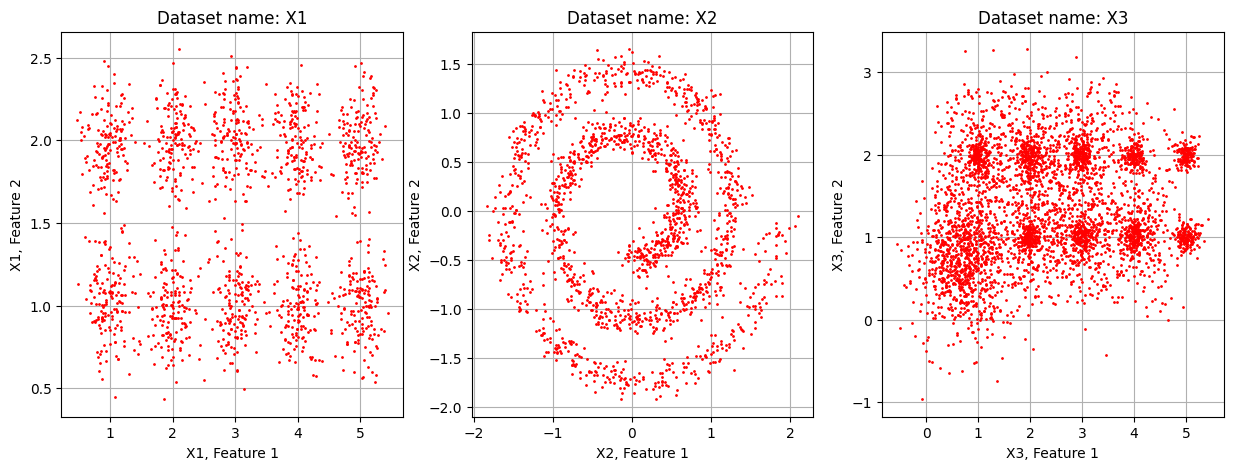

In [53]:
# getting things started
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np


# generate some sample data
n_samples = 1700
np.random.seed(0)

#======= Sample data ONE
cluster_centers = [[1.0,1], [1,2], [2,1], [2,2], [3,1], [3,2], [4,1], [4,2], [5,1], [5,2]]
X1 = np.array(cluster_centers) # cluster prototypes
X1 = np.repeat(X1, 150, axis=0)
X1 += .2 * np.random.randn(X1.shape[0],2) # add some randomness

#====== Sample data TWO
# Generate some harder sample data
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t) / 10.0
y = t * np.sin(t) / 10.0

X2 = np.concatenate((x, y))
X2 += .1 * np.random.randn(2, n_samples) # add some randomness
X2 = X2.T # and transpose it

#====== Sample data THREE
cluster_centers[0] = [0.75,0.75]
cluster_centers.insert(0,[0.75,0.75])
X3 = np.array(cluster_centers) # cluster prototypes
X3 = np.repeat(X3, 150, axis=0)
X3 += .1 * np.random.randn(X3.shape[0],2) # add some randomness
X3[0:300] += .3 * np.random.randn(300,2) # add spread to first class

#Python 3...
n_samples = int(len(X3)/4*3)
#n_samples = len(X3)/4*3
Xtmp1 = X3[0:n_samples] + .4 * np.random.randn(n_samples,2) # create some spread in the points
Xtmp2 = X3[0:n_samples] + .4 * np.random.randn(n_samples,2) # create some spread in the points
X3 = np.concatenate((X3,Xtmp1,Xtmp2)) # and add them back in for differing density

# now plot each dataset
plt.figure(figsize=(15,5))
for i,X in enumerate([X1,X2,X3]):
    plt.subplot(1,3,i+1)
    plt.plot(X[:, 0], X[:, 1], 'r.', markersize=2) #plot the data
    plt.title('Dataset name: X{0}'.format(i+1))
    plt.xlabel('X{0}, Feature 1'.format(i+1))
    plt.ylabel('X{0}, Feature 2'.format(i+1))
    plt.grid()

plt.show()

**Question 1**: For each dataset, is it:
- best described as center-based, contiguous, or density based (or a mix of more than one)?
- best described as partitional or hierarchical?  

**Question 2**: Given the plots above for each dataset, what type of clustering algorithm would you consider using for each and why? That is, give your opinion on whether k-means, hierarchical agglomerative, and/or DBSCAN are appropriate for each dataset.


Enter your answers to Questions 1 & 2 here:

**Question 1 Answer**  
X1: Center based, Partitional. X2: Density-based, Partitional X3: Mixed, Hierarchical  

**Question 2 Answer**  
**X1**:K-means is appropriate as it optimizes for center-based spherical clusters  
**X2**: DBSCAN is made for finding arbitrarily shaped, dense clusters with gaps between them.  
**X3**: DBSCAN can be appropriate as it picks up dense, tight blobs as clusters.    






## Kmeans Clustering in Scikit
Now lets look at calculations in K-Means clustering with `scikit-learn` and see if we can calculate the difference between two different clusterings. Lets start by using k-means clustering on the first dataset. The code is given for you below as well as code for plotting the centroids, as shown. Take a look to see how k-means is run.

You can also see the documentation for k-means here:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

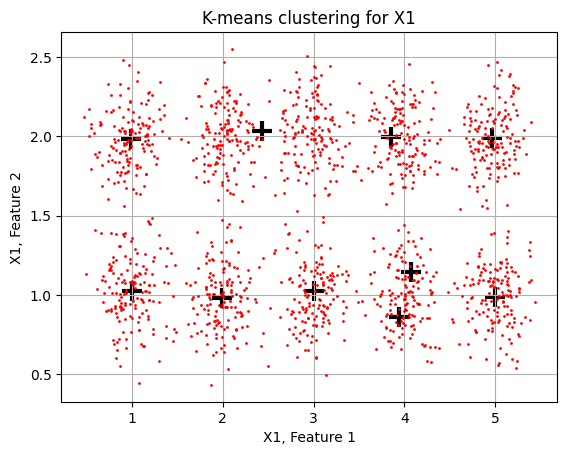

In [54]:
from sklearn.cluster import KMeans

# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(init='random', # initialization k-means++ or random
        n_clusters=10,  # number of clusters
        n_init=3)     # number of different times to run k-means


kmeans.fit(X1)

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X1[:, 0], X1[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()

**Question 3**:

a)  Is the above a good clustering of the data? Why or why not?

b) Run the block of code a few times. Did the results ever improve? Is the clustering consistent?

c) How might we make the clustering more consistent in finding the optimal clustering (i.e., the clustering with the smallest SSE)?

Enter your answer here:

**a)** Yes. The clustering in the plot is a good clustering of dataset X1. The reason is the black + marker representing the 10 centroids align very well with the cneters of the dense blobs in the dataset. Each centroid is right on top of a clear cluster of points, which indicates k-means successfully identified the correct grouping.  

**b)** Yes. It improves.  

**c)** To make k-means clustering more consistent to find the optimal solution with the lowest sum of squared errors, we can increase n_init as it controls how many times the entire k-means algorithm runs with different centroid seeds. It will increases the chance of finding the global optimum.




## K-means consistency
**Question 4**: Now let's try to make the kmeans clustering more consistent. Change the `n_init` and `init` parameters of kmeans such that (almost) every time you run the block of code, the optimal clustering is found. Make sure that the solution you find is as *efficient as possible*.

/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountere

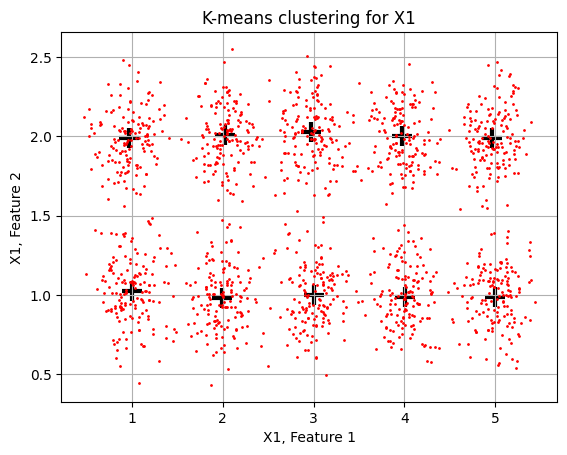

All SSEs from multiple runs: [109.88 109.88 109.88 109.88 109.88 109.88 109.88 109.88 109.88 109.88
 109.88 109.88 109.88 109.88 109.88 109.88 109.88 109.88 109.88 109.88]
Minimum SSE observed: 109.87509274288412
Maximum SSE observed: 109.87509274288414
✅ Clustering is consistent! Your n_init is sufficient.


In [55]:
from sklearn.cluster import KMeans

#--------Change parameters below this line---------------------------
# CHANGE THE PARAMETERS HERE TO GET A CONSISTENTLY OPTIMAL CLUSTERING
# run kmeans algorithm (this is the most traditional use of k-means)
# kmeans = KMeans(
#     init='k-means++',    # initialization
#     n_clusters=10,    # number of clusters
#     n_init=20)         # number of different times to run k-means
num_trials = 20
inertias = []

for i in range(num_trials):
    kmeans = KMeans(
        init='k-means++',
        n_clusters=10,
        n_init=10,         # the value you want to test for sufficiency
        random_state=None  # allow randomness
    )


#--------Change parameters above this line---------------------------

    kmeans.fit(X1)
    inertias.append(kmeans.inertia_)

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X1[:, 0], X1[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()

print("All SSEs from multiple runs:", np.round(inertias, 2))
print("Minimum SSE observed:", np.min(inertias))
print("Maximum SSE observed:", np.max(inertias))
if np.isclose(np.min(inertias), np.max(inertias)):
    print("✅ Clustering is consistent! Your n_init is sufficient.")
else:
    print("⚠️ Clustering varies. Try increasing n_init for better consistency.")




## Mini-batching for better performance
Traditional Kmeans uses a "Batch" approach where each point is looked at for every iteration. By incrementally updating the centroids in the space, we can get a more efficient way of finding the centroids without visiting every point in the dataset at each iteration. We talked about this in the video lecture and it was called "Mini-Batch Kmeans." The following code will run both kmeans and mini-batch kmeans using `scikit-learn`'s implementations. The mini-batch size is set currently to ten instances. Each algorithm is timed for each run and the times are shown after the block of code (I am using the `%time` magics for ipython). Answer the questions that follow this block of code.


/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/hayoungcheon/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountere

Time for BatchKMeans:
CPU times: user 8.62 ms, sys: 21.3 ms, total: 29.9 ms
Wall time: 2.58 ms
Time for MiniBatchKMeans:
CPU times: user 166 ms, sys: 246 ms, total: 412 ms
Wall time: 31.2 ms


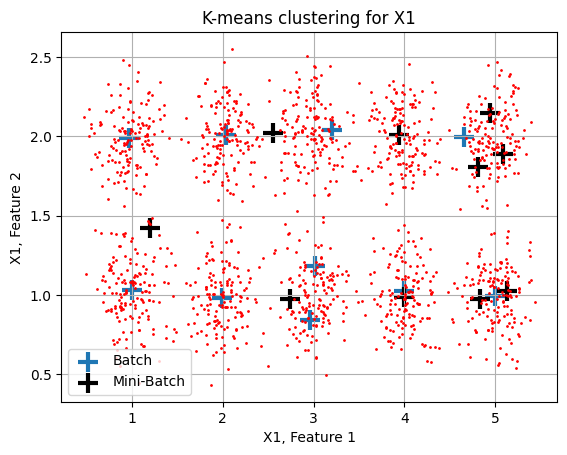

In [56]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini = MiniBatchKMeans(n_clusters=10, batch_size=10) # note the use of the n_init arguement - Future Warning
kmeans = KMeans(n_clusters=10)

print('Time for BatchKMeans:')
%time kmeans.fit(X1)
print('Time for MiniBatchKMeans:')
%time kmeans_mini.fit(X1)


# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X1[:, 0], X1[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, label='Batch')  # plot the centroids

centroids = kmeans_mini.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k',label='Mini-Batch')  # plot the centroids
plt.legend()
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()

**Question 5**:

a) Is mini-batch faster than kmeans for this example? Does this make sense to you? Why or why not?

b) Are the results comparable to one another?

c) To compare the results mathematically, what objective function would you use?

d) Does `scikit-learn`'s implementation have a property in the fitted object for getting the value of this objective function?

e) If so, compare the objective function value for the `kmeans` object and the `kmeans_mini` object. Which is better?


Enter your answer here:
**a)** It is slower than kmeans by 20 times. This could be because dataset is too small so traditional k-means converges in just a few iterations very quickly. Or MniBatchKMeans has extra setup work which can dominate runtime on small datasets, making it slower than batch k-means despite its theoritical scaling advantage.  
**b)** Yes. the results are comparable. Despite using approximate incremental updates, MiniBatchKMeans converged to almost exactly the same centroids as full-batch KMeans.  
**c)** To mathematically compare the results of Batch KMenas and MiniBatchKMeans, we should use the objective function Sum of Squred Errors(SSE)  
**d)** Yes `.inertia_` attribute returns the sum of squared distances of each point to its closes cluster center after convergence.  
**e)**  Batch KMeans is better as it has lower SSE.  



Enter any calculations needed below:

In [57]:
# Use this space for any calculations you may want to perform for the objective function

print('Batch objective function value:', kmeans.inertia_)
print('Mini-Batch objective function value:', kmeans_mini.inertia_)

Batch objective function value: 172.661240786752
Mini-Batch objective function value: 321.775509587629


## DBSCAN
Now lets use the remaining datasets to investigate the use of DBSCAN clustering. As a reminder, this is what the two datasets look like:

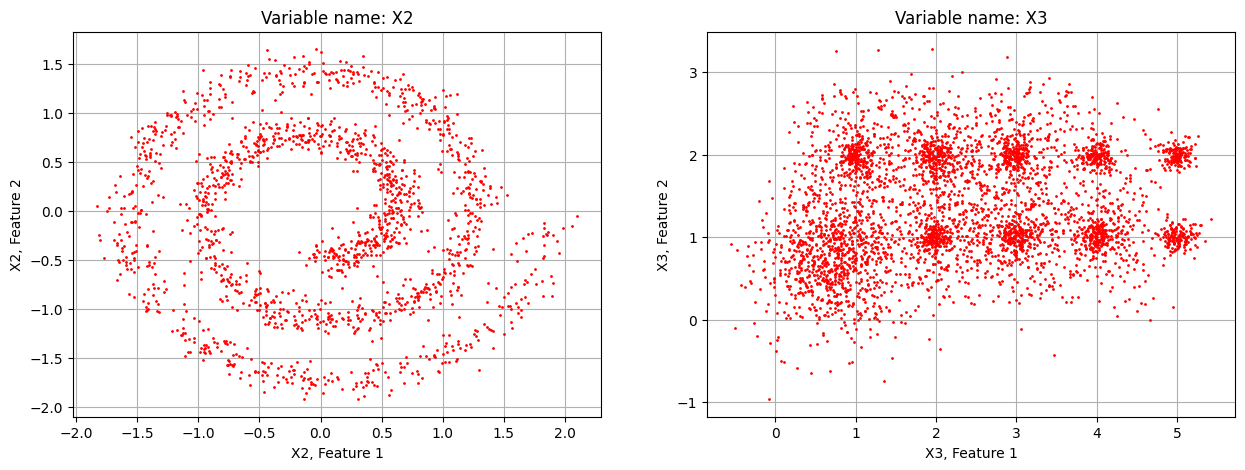

In [58]:
from sklearn.cluster import DBSCAN

# now plot each dataset
plt.figure(figsize=(15,5))
for i,X in enumerate([X2,X3]):
    plt.subplot(1,2,i+1)
    plt.plot(X[:, 0], X[:, 1], 'r.', markersize=2) #plot the data
    plt.title('Variable name: X{0}'.format(i+2))
    plt.xlabel('X{0}, Feature 1'.format(i+2))
    plt.ylabel('X{0}, Feature 2'.format(i+2))
    plt.grid()

plt.show()


Recall that with DBSCAN, we need to set the values for eps and for MinPts to create core points, border points, and noise points.

**Question 6**: Can you come up with a reasonable value for *eps* and *MinPts* from the above graphs? What are your guesses and why did you choose them?
  


**Enter your answer here:**  
For X2, `eps` must be big enough to connect points along each ring and not so big that it bridges the gap between the inner and outer rings, merging them into one cluster. eps as 0.15-0.2 `MinPts` as 5 should reflect 2D data and filter out spurious small point groups.  
For X3, `eps` 0.05-0.1 as it should be small enough to only connect points inside each dense blob. `MinPts` should be slightly higher maybe around 8 to avoid accidentally treating a few scattered noise points as tiny clusters.



Now, let's investigate the value of MinPts and eps for the given datasets by graphing out the distances to the $N^{th}$ nearest neighbors (as we did at the end of the lecture video). This example sets N=4, but you can change it to be whatever value you think is reasonable from above. You can also try changing the value to find a better graph.

The code below will calculate and graph the distances to the $N^{th}$ nearest neighbors for each dataset (the variable names are `X2_N` and `X3_N`).

**Question 7**: Investigate the graphs at the end and choose a value of MinPts and Eps for each dataset.  What is the value of Eps and MinPts and why do you think it will work given these graphs?

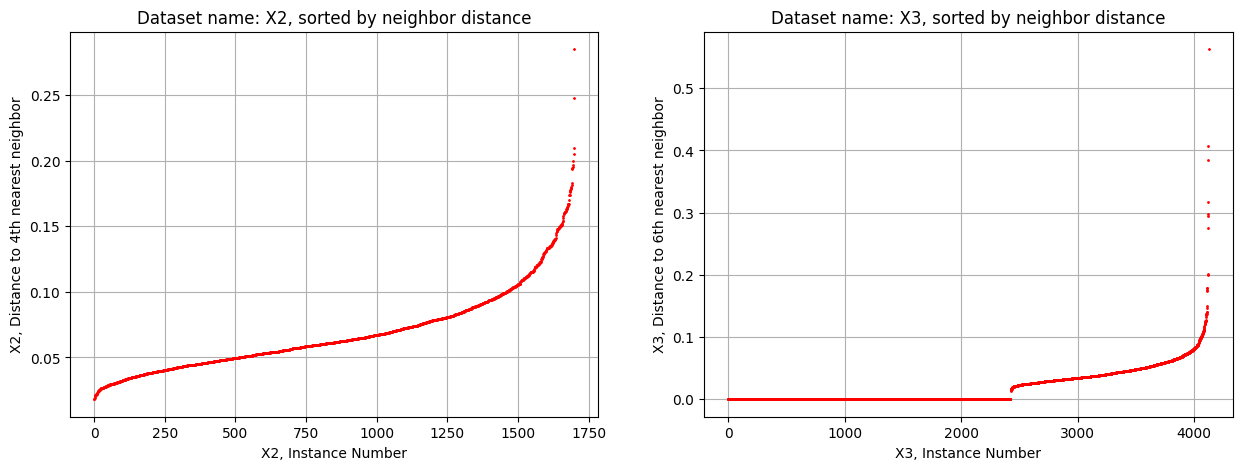

In [59]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
X2_N = 4
X3_N = 6
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X2_knn_graph = kneighbors_graph(X2, X2_N, mode='distance') # calculate distance to four nearest neighbors
X3_knn_graph = kneighbors_graph(X3, X3_N, mode='distance') # calculate distance to four nearest neighbors

N2 = X2_knn_graph.shape[0]
X2_4nn_distances = np.zeros((N2,1))
for i in range(N2):
    X2_4nn_distances[i] = X2_knn_graph[i,:].max()

X2_4nn_distances = np.sort(X2_4nn_distances, axis=0)

N3 = X3_knn_graph.shape[0]
X3_4nn_distances = np.zeros((N3,1))
for i in range(N2):
    X3_4nn_distances[i] = X3_knn_graph[i,:].max()

X3_4nn_distances = np.sort(X3_4nn_distances, axis=0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N2), X2_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X2, sorted by neighbor distance')
plt.xlabel('X2, Instance Number')
plt.ylabel('X2, Distance to {0}th nearest neighbor'.format(X2_N))
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(N3), X3_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X3, sorted by neighbor distance')
plt.xlabel('X3, Instance Number')
plt.ylabel('X3, Distance to {0}th nearest neighbor'.format(X3_N))
plt.grid()

plt.show()


**Enter your answer here:**  
For X2, we could see the elbow is around 0.15-0.18 which could be `eps` value. MinPts can be 4 which will be consistent with 4-nearest neighbor plot.
For X3, `eps` 0.06 since the knee where distances start rising quickly is right around here and `MinPts` for balancing detection can be around 6. 





___
## DBSCAN testing eps and minpts
Now test your values of eps from the above question for each dataset. The code below will train and plot clusters with the given parameters.

 **Question 8 (extra)**: Enter your chosen MinPts and Eps parameters for each dataset and analyze the output.
- Do the parameters you chose for these datasets end up with valid clusterings? Why or why not?
- What range of parameters would give valid clusterings for each dataset?

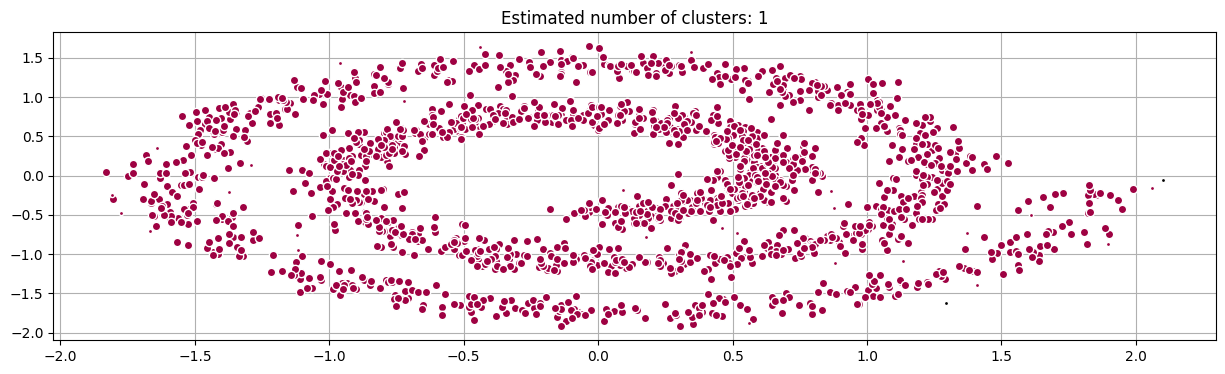

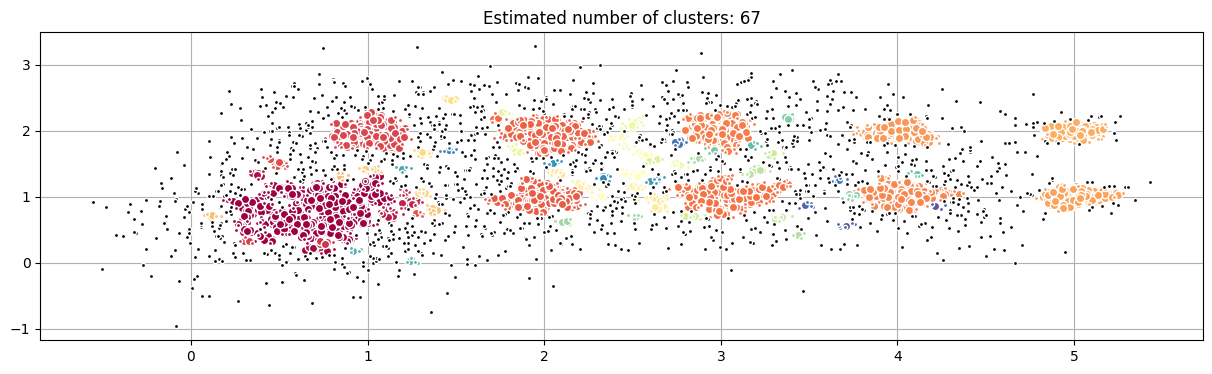

In [60]:
from sklearn.cluster import DBSCAN

#=====================================
# ENTER YOUR CODE HERE TO CHANGE MINPTS AND EPS FOR EACH DATASET
X2_minpts = 4 # from above
X2_eps = 0.15
X3_minpts =6 # from above
X3_eps = 0.06
#=====================================

for i, (data, minpts, eps) in enumerate(zip([X2,X3],[X2_minpts,X3_minpts],[X2_eps,X3_eps])):

    db = DBSCAN(eps=eps, min_samples=minpts).fit(data)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # mark the samples that are considered "core"
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    plt.figure(figsize=(15,4))
    unique_labels = set(labels) # the unique labels
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        # plot the core points in this class
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=6)

        # plot the remaining points that are edge points
        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=3)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.grid()
    plt.show()


**Enter your answer here:**  

For **X2** Dataset, we are expecting to see two cluster, inner cluser and outer cluster. It has only one cluster which suggests `eps` value is slighly large it allowed DBSCAN to connect points across the gap between the inner and outer rings, merging them into one big cluster. Since the parameter did not produce valid clustering so we need to adjust `eps` value little less than 0.15.  

For **X3** Dataset, there are 67 clusters which is too many than we expected. This indicates `eps` value was too that noise and slight variations inside each dense blob led DBSCAN to split them excessively.






That's all! Please **upload your rendered notebook** and please include **team member names** in the notebook submission.